In [4]:
import json

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

from nltk.tokenize import RegexpTokenizer
from pattern.en import lemma
from nltk.corpus import stopwords
from collections import Counter

from wordcloud import WordCloud
from PIL import Image
import numpy as np
import random
from palettable.colorbrewer.sequential import Reds_4

pd.options.mode.chained_assignment = None

In [7]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [8]:
sw = stopwords.words('english')
ret = RegexpTokenizer('[a-zA-Z\']+')

In [9]:
with open('majority/message.json', encoding='utf-8') as json_data:
    d = json.load(json_data)

In [13]:
print(d[1])

{'attachments': [], 'avatar_url': 'https://i.groupme.com/985x739.jpeg.4c9fb4efe91f4998b5bf997abde07555', 'created_at': 1546913308, 'favorited_by': ['20687509', '50897889'], 'group_id': '39263023', 'id': '154691330894060791', 'name': 'Sam Kawell', 'sender_id': '6516170', 'sender_type': 'user', 'source_guid': 'android-476ce5e0-e423-4ee5-b1dd-ae15b77f27a5', 'system': False, 'text': 'On a completely unrelated note, may I have more eggs?', 'user_id': '6516170'}


In [14]:
added_users_list_ids_majority = []
added_users_list_names_majority = []
for entry in d:
    if entry['user_id'] not in added_users_list_ids_majority:
        added_users_list_ids_majority.append(entry['user_id'])
        added_users_list_names_majority.append(entry['name'])

In [18]:
likes = []
for entry in d:
    if len(entry['favorited_by']) > 0:
        for ids in entry['favorited_by']:
            likes.append(ids)

In [65]:
dict_of_likes = dict(Counter(likes))

In [70]:
likes_with_names = {}
for k, v in dict_of_likes.items():
    if k in dictionary_of_usernames:
        actual_name = dictionary_of_usernames[k]
        print(v)
        likes_with_names[dictionary_of_usernames[k]] = v

1300
4695
1086
1488
1125
1699
861
399
1504
1134
817
392
104
194
645


In [71]:
likes_with_names

{'Blaine, E': 1300,
 'Keaton Rhea': 4695,
 'Sam Kawell': 1086,
 'Elizabeth Kidd Yost': 1488,
 'Joseph Spalding': 1125,
 'Daniel R🔹️dos 40🔹️': 1699,
 'Matt Inger': 861,
 'Darren May': 399,
 'Ian Fraser': 1504,
 'David Busby': 1134,
 'Cindy R': 817,
 'Michelle U': 392,
 'Phil Pearson': 104,
 'Taylor Pruitt': 194,
 'Amanda': 645}

In [52]:
my_dictionary = {k: dictionary_of_usernames(k) for k, v in dict_of_likes.items()}

TypeError: 'dict' object is not callable

In [4]:
added_users_list_ids = []
added_users_list_names = []
for entry in reversed(d):
    if 'event' in entry and entry['event']['type'] == 'membership.announce.added':
        if str(entry['event']['data']['added_users'][0]['id']) not in added_users_list_ids:
            added_users_list_ids.append(str(entry['event']['data']['added_users'][0]['id']))
            added_users_list_names.append(entry['event']['data']['added_users'][0]['nickname'])

In [30]:
added_users_list_ids

NameError: name 'added_users_list_ids' is not defined

In [31]:
added_users_list_names

NameError: name 'added_users_list_names' is not defined

In [57]:
dictionary_of_usernames = dict(zip(added_users_list_ids_majority, added_users_list_names_majority))
dictionary_of_usernames['system'] = 'GroupMe'
# dictionary_of_usernames['8847121'] = 'Emily Ong'

In [26]:
with open('history.txt', 'w', encoding='utf-8') as outfile:
    for entry in reversed(d):
        if entry['text'] is not None:
            outfile.write(dictionary_of_usernames[str(entry['user_id'])] + '  ----->  ' + entry['text'])
            outfile.write("\n")

In [58]:
dictionary_of_usernames

{'50897889': 'Keaton Rhea',
 '6516170': 'Sam Kawell',
 '50701490': 'Elizabeth Kidd Yost',
 '50279830': 'David Busby',
 '49763340': 'Darren May',
 '28857550': 'Ian Fraser',
 '20687509': 'Blaine, E',
 '50688415': 'Daniel R🔹️dos 40🔹️',
 '38032768': 'Joseph Spalding',
 '52389806': 'Matt Inger',
 '50688180': 'Cindy R',
 '616328': 'GORT',
 'system': 'GroupMe',
 '5254848': 'Taylor Pruitt',
 '9926857': 'Michelle U',
 '6019466': 'Amanda',
 '24675103': 'Phil Pearson'}

In [30]:
df = pd.read_json('majority/message.json', encoding='utf-8')

In [31]:
df.drop(['attachments', 'avatar_url', 'group_id', 'id', 'source_guid', 'system', 'sender_type', 'name',], axis=1, inplace=True)
df['user_id'] = df['user_id'].map(dictionary_of_usernames)
df = df.rename(columns = { 'user_id': 'name'})

In [32]:
# Removes all sumbissions by the GroupMe system (e.g. "x has changed their nickname to y")
df_no_system = df.loc[df.name != 'GroupMe']

In [33]:
df_no_system['Year'] = df_no_system['created_at'].dt.year
df_no_system['Month'] = df_no_system['created_at'].dt.month
df_no_system['Day'] = df_no_system['created_at'].dt.day

df_no_system['num_likes'] = df_no_system.apply(lambda row: len(row.favorited_by), 
                                                axis=1)

In [34]:
df_no_system['text'].dropna(inplace=True)

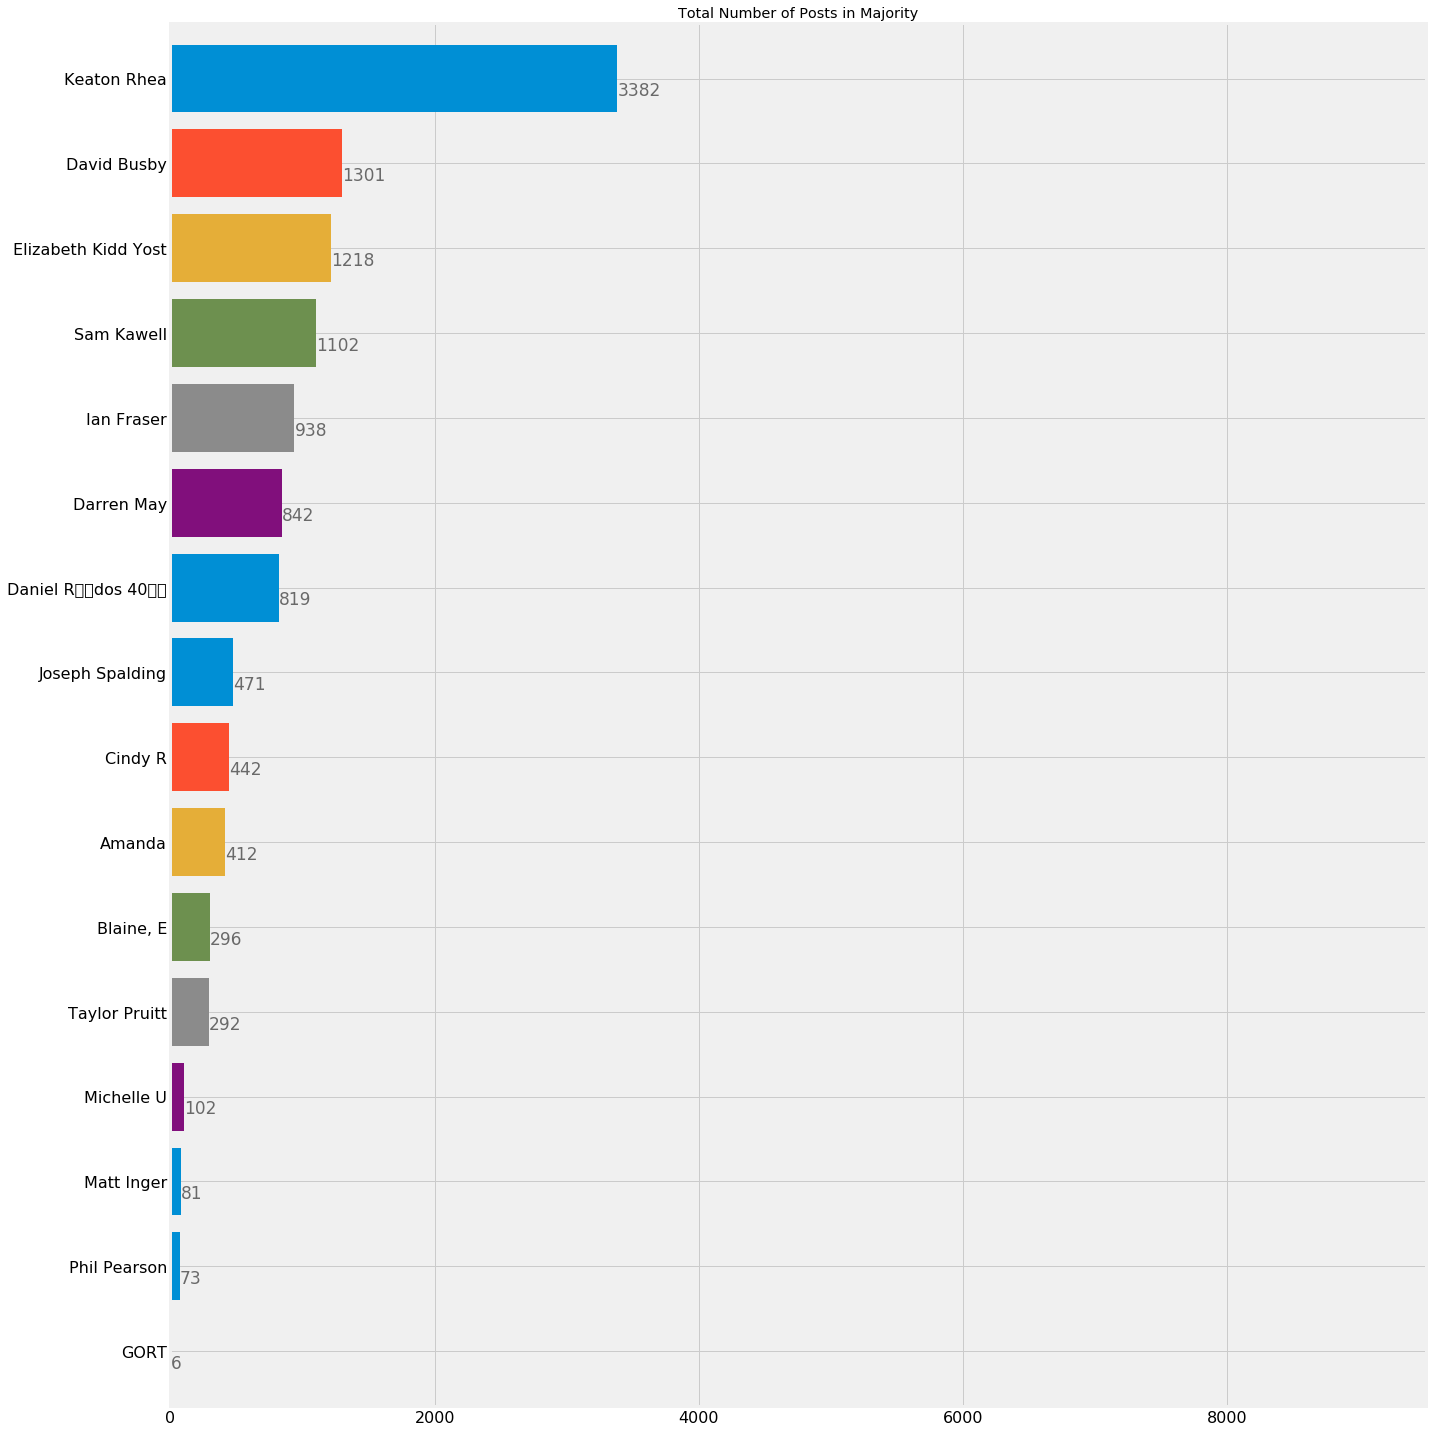

In [36]:
plot = df_no_system['name'].value_counts().plot.barh(figsize=(20,20), width=0.8, fontsize=16, title='Total Number of Posts in Majority')
plot.invert_yaxis()
plot.set_xlim(left = 0, right=9500)
for i in plot.patches:
    # get_width pulls left or right; get_y pushes up or down
    plot.text(i.get_width()-.03, i.get_y()+.6, str(round((i.get_width()), 2)), fontsize=17, color='dimgrey')
fig = plot.get_figure()
fig.tight_layout()
fig.savefig("output.png")

In [165]:
df['Year'] = df['created_at'].dt.year
df['Month'] = df['created_at'].dt.month
df['Day'] = df['created_at'].dt.day


df['num_likes'] = df.apply(lambda row: len(row.favorited_by), axis=1)

In [ ]:
plot = df.groupby(df['created_at'].rename('Hours').dt.hour).size().plot(title='Total Number of Posts in Per Hour', figsize=(20,10), xticks=[i for i in range(24)])

In [17]:
def num_likes(likers):
    return len(likers)

In [166]:
df['num_likes'] = df.apply(lambda row: len(row.favorited_by), axis=1)

In [18]:
df.head()

,created_at,event,favorited_by,sender_id,text,name,Year,Month,Day,num_likes
0,2018-12-10 00:45:23,NaN,"[11957744, 20687509, 50897889]",system,Blacklisted changed name to 8hr Gym Pokérection,GroupMe,2018,12,10,3
1,2018-12-10 00:37:59,NaN,"[20687509, 50897889]",6019466,Bet I am almost dead middle.,Amanda Mesiarik Davidson,2018,12,10,2
2,2018-12-10 00:17:00,NaN,"[20687509, 50897889]",28857550,LOL no it's not you Keaton,Ian Fraser,2018,12,10,2
3,2018-12-10 00:16:07,NaN,"[20687509, 50897889]",26058623,"Naw cat, its not you",Taylor Peacock,2018,12,10,2
4,2018-12-10 00:15:46,NaN,"[20687509, 50897889]",50897889,Me? I did not post much earlier on,Keaton Rhea,2018,12,10,2


In [167]:
tokenize_title_text = [ret.tokenize(t.lower()) for t in df_no_system['text']]

In [168]:
flat_text_list = [item for sublist in tokenize_title_text for item in sublist]

In [169]:
eleiminate_sw = [lemma(word) for word in flat_text_list if word not in sw]

In [170]:
bag_of_words = Counter(eleiminate_sw)

In [171]:
icon = Image.open("pokemon-plus.png")
icon = icon.convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

In [172]:
from palettable.colorbrewer.sequential import Reds_4

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Reds_4.colors[random.randint(0,3)])

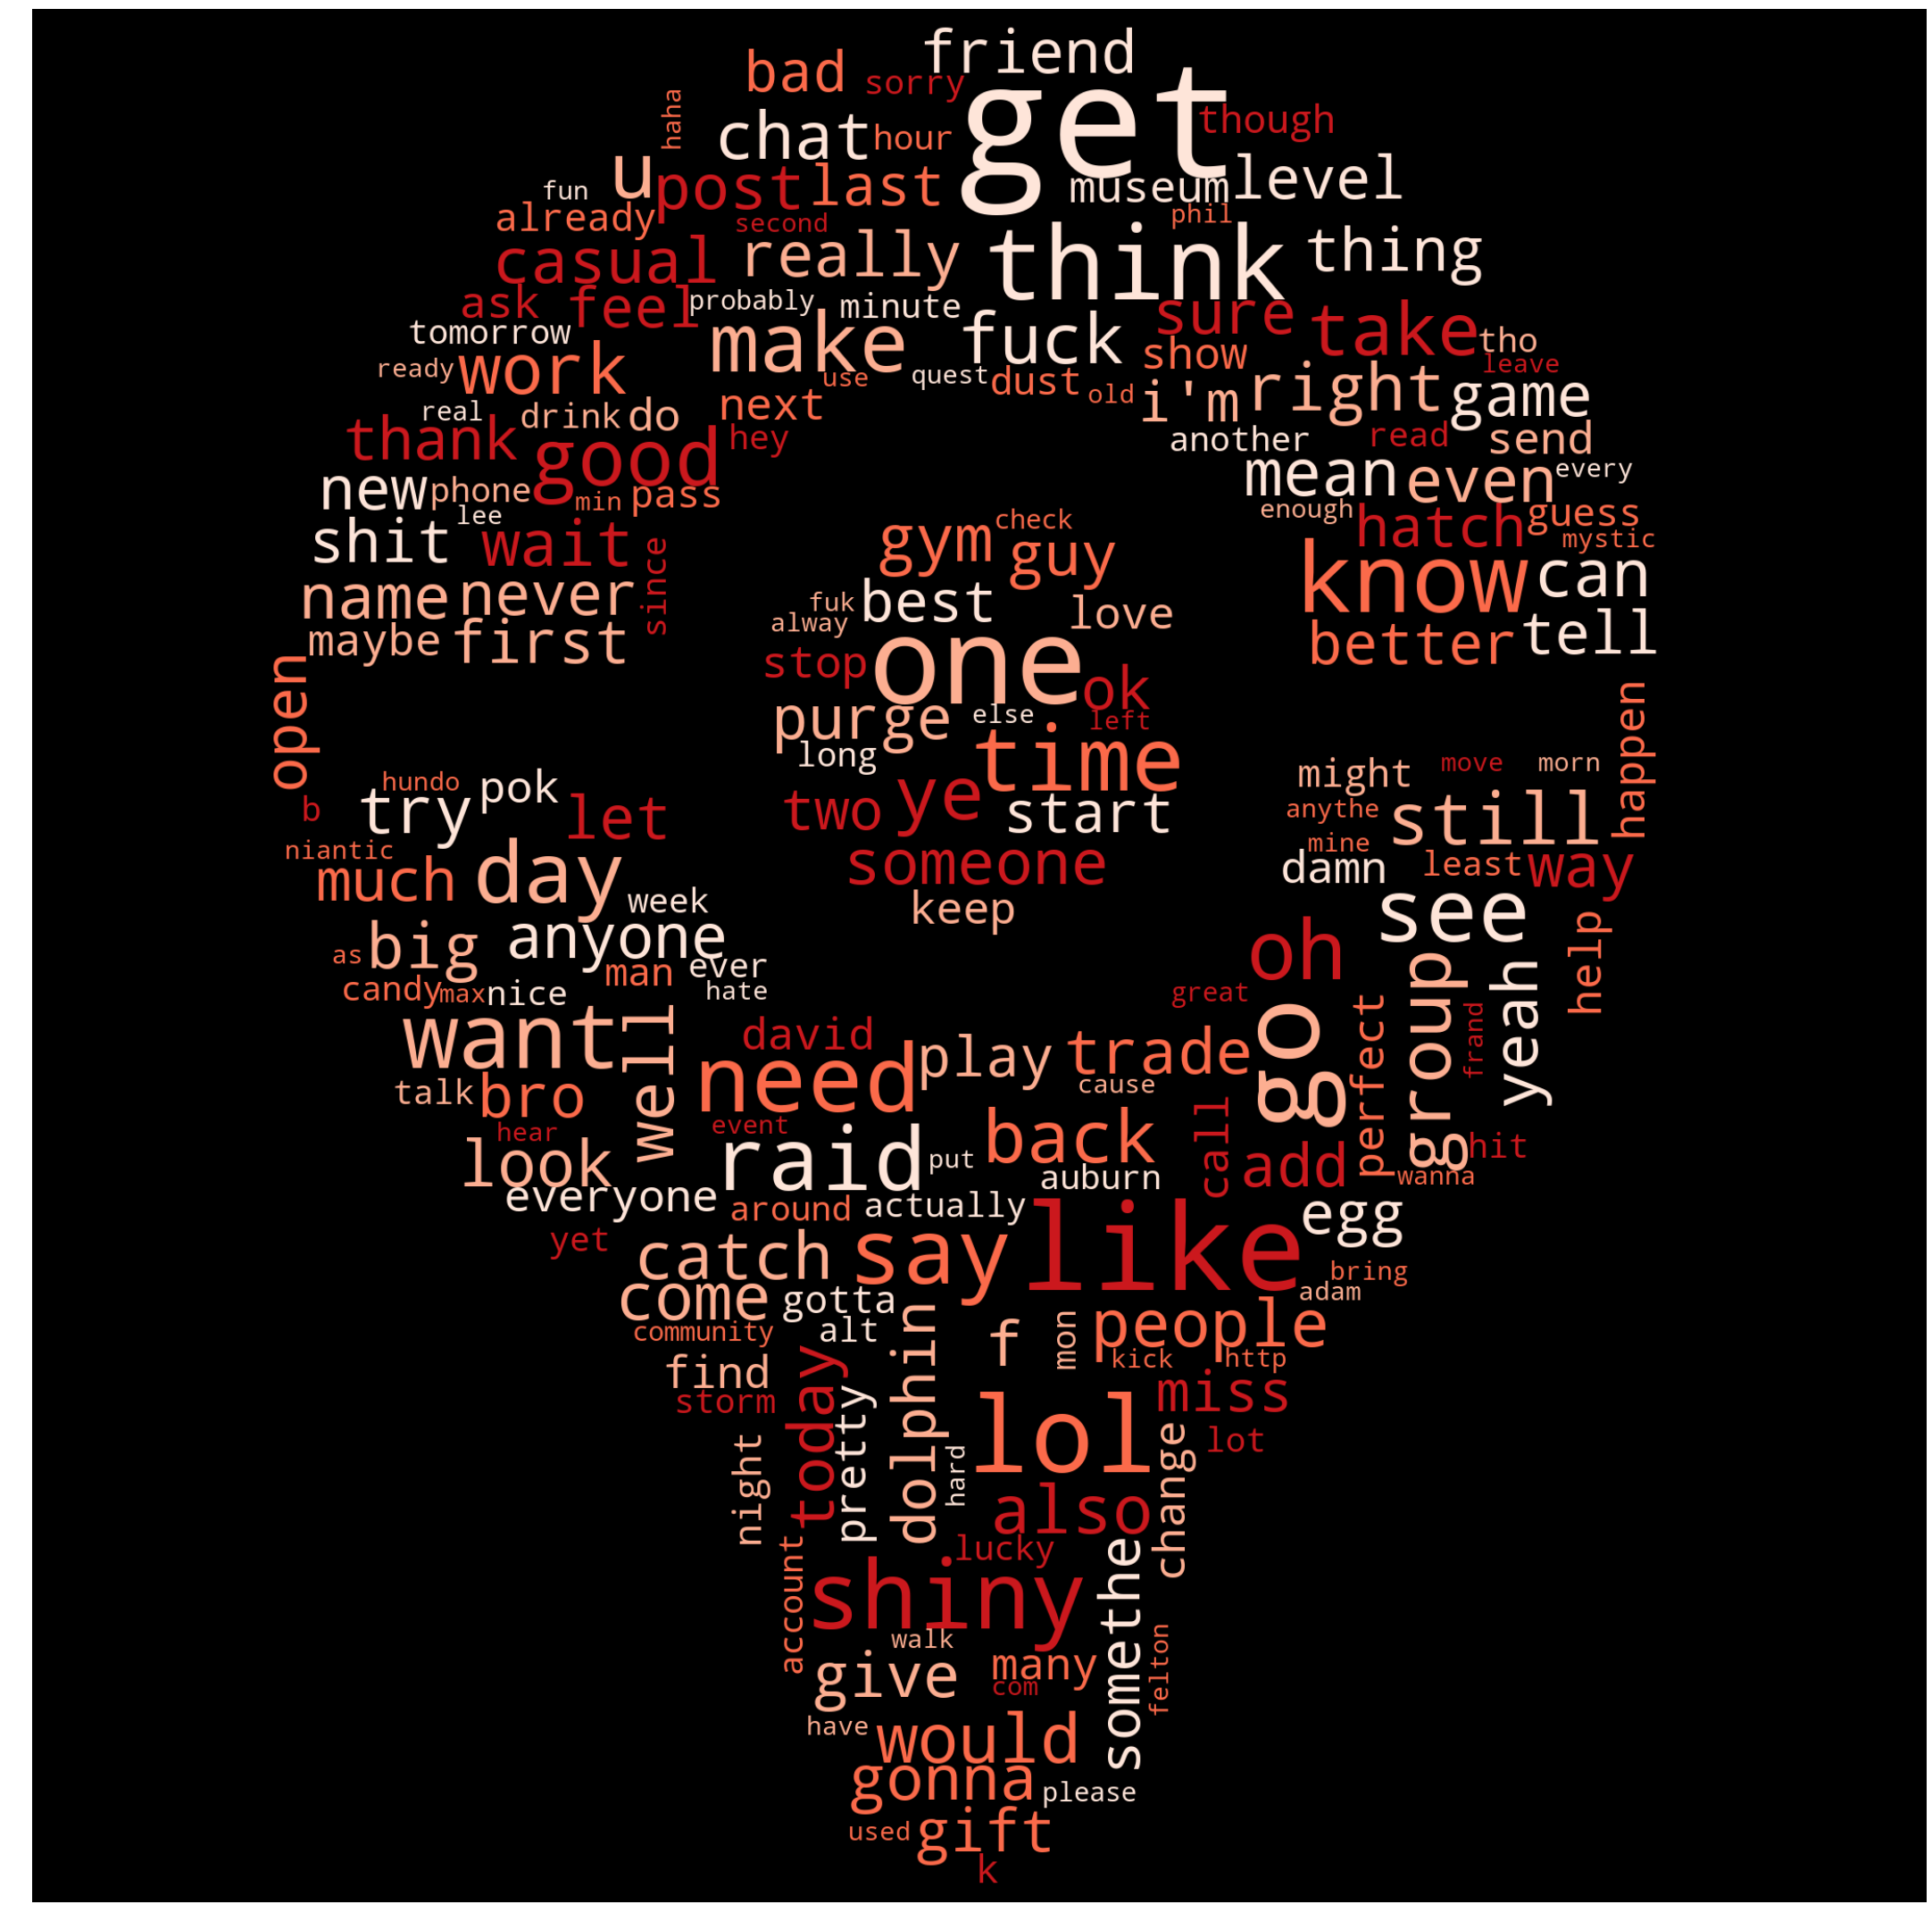

In [173]:
wordcloud = WordCloud(mask=mask, mode='RGBA')
wordcloud.generate_from_frequencies(frequencies=bag_of_words)
wordcloud.recolor(color_func=color_func, random_state=3)
plt.figure(figsize=[40,30])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig('wordcloud.png', dpi=200, bbox_inches='tight', transparent=True)